## Fashion Product Images
In this project we will be predicting a fashion product image's category and gender. The product' s category will be divided into three, Main Category, Sub Category, and Article Type. The learning algorithm that we will be using is only limited to Random Forest and XGBoost.

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import pandas as pd 
import seaborn as sns
import os 

In [3]:
# Import Dataset
DATASET_PATH = "/Purwadhika/FINAL PROJECT/test1/fashion-dataset/fashion-dataset/"
print(os.listdir(DATASET_PATH))

['images', 'images.csv', 'styles', 'styles.csv']


In [4]:
# Dataset into DataFrame
df = pd.read_csv(DATASET_PATH + "styles.csv", error_bad_lines=False)
# Adding Image Column for image file reference
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


In [5]:
df.shape

(44424, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 11 columns):
id                    44424 non-null int64
gender                44424 non-null object
masterCategory        44424 non-null object
subCategory           44424 non-null object
articleType           44424 non-null object
baseColour            44409 non-null object
season                44403 non-null object
year                  44423 non-null float64
usage                 44107 non-null object
productDisplayName    44417 non-null object
image                 44424 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 3.7+ MB


### Overall insight on category distribution.

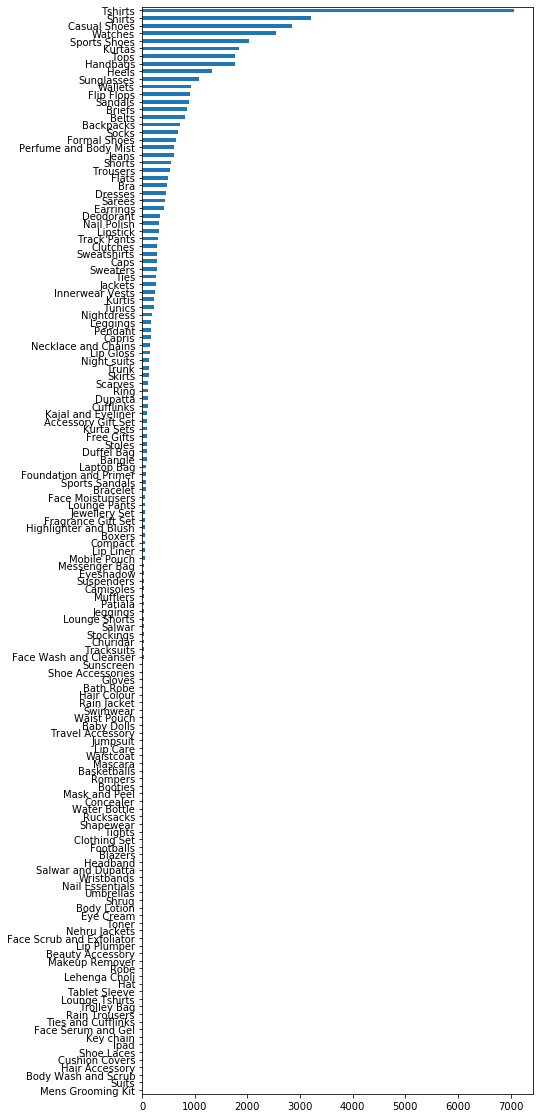

In [7]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

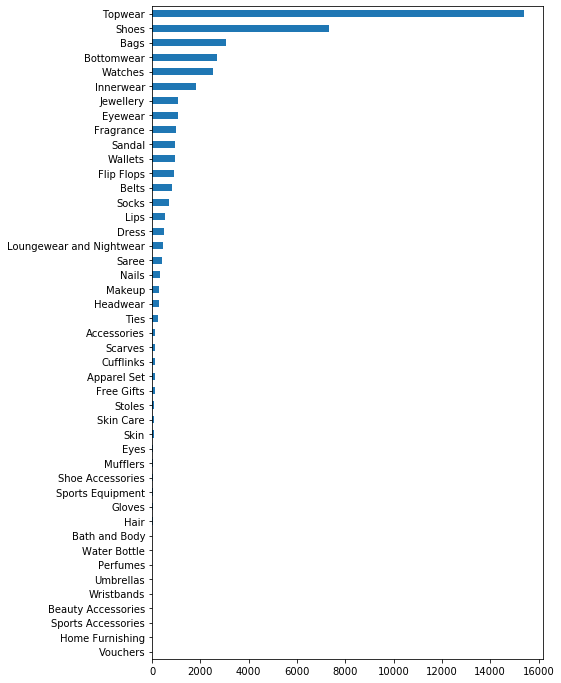

In [8]:
plt.figure(figsize=(7,12))
df.subCategory.value_counts().sort_values().plot(kind='barh')

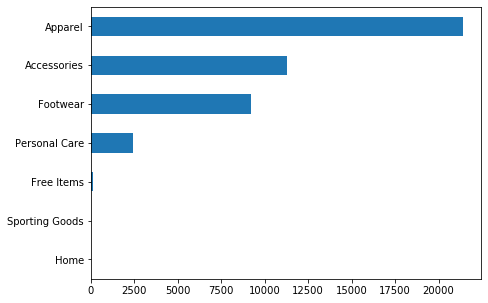

In [9]:
plt.figure(figsize=(7,5))
df.masterCategory.value_counts().sort_values().plot(kind='barh')

### Removing categories with low amount of data
Since the smallest combination of data we are aiming in this project is articleType and Gender. We will be removing the combinations of both of them which its amount of data are less than a minimum value (min_amount). This value is believed to be the minimum amount of data per class a model needs to be trained and tested. 

In [10]:
min_amount = 100
# category combination with amount under minimum amount value
df_sample = df.groupby(['articleType','gender']).count().sort_values('id',ascending=False)[['id']]
df_sample = df_sample[df_sample['id']<min_amount].reset_index()
df_sample

,articleType,gender,id
0,Accessory Gift Set,Men,97
1,Trousers,Women,95
2,Sandals,Unisex,94
3,Ring,Women,92
4,Kurta Sets,Women,90
...,...,...,...
204,Cushion Covers,Unisex,1
205,Fragrance Gift Set,Unisex,1
206,Suits,Men,1
207,Churidar,Boys,1


In [11]:
# removing articleType and gender combination amount below the minimal amount
indexes = []

for i in range(len(df_sample)):
    for idx in df[(df['articleType']==df_sample.iloc[i].articleType) &
      (df['gender']==df_sample.iloc[i].gender)].index:
        indexes.append(idx)

print('Amount of data to be dropped (out of category): ' + str(len(indexes)))

Amount of data to be dropped (out of category): 4351


In [12]:
df.drop(indexes,inplace=True)

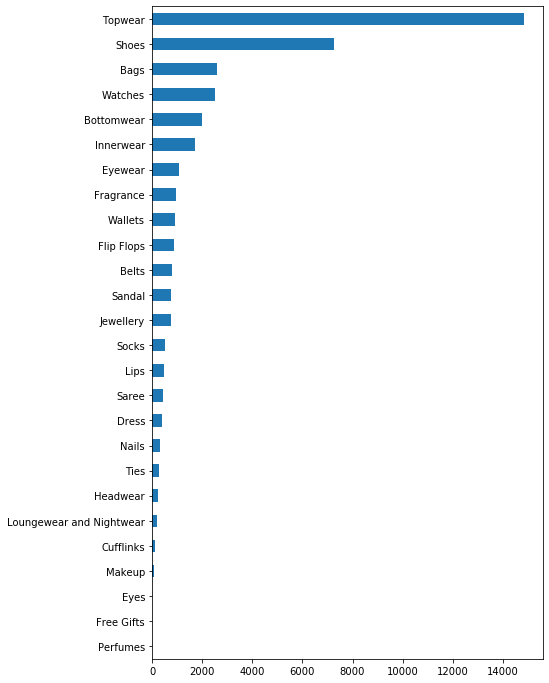

In [13]:
plt.figure(figsize=(7,12))
df.subCategory.value_counts().sort_values().plot(kind='barh')

> The Sub Category looks better, but we will still need to filter the Sub Category by removing categories which has less data than a minimum amount value.

In [14]:
# Sub Categories under minimum amount
min_amount = 250
df_sample = df.groupby(['masterCategory','subCategory']).count()[['id']].sort_values('id',ascending=False)
df_sample = df_sample[df_sample['id']<min_amount].reset_index()
df_sample.groupby(['masterCategory','subCategory']).mean()

id
masterCategory subCategory                  
Accessories    Cufflinks                 106
               Perfumes                    1
Apparel        Loungewear and Nightwear  190
Free Items     Free Gifts                 10
Personal Care  Eyes                       16
               Makeup                     86
               Perfumes                    5

In [15]:
# removing subCategory with amount under minimum amount
indexes = []
subs = df_sample['subCategory'].unique()

for i, row in df[['subCategory']].iterrows():
    if row[0] in subs:
        indexes.append(i)
        
print('Amount of data to be dropped (out of category): ' + str(len(indexes)))

Amount of data to be dropped (out of category): 414


In [16]:
df.drop(indexes,inplace=True)

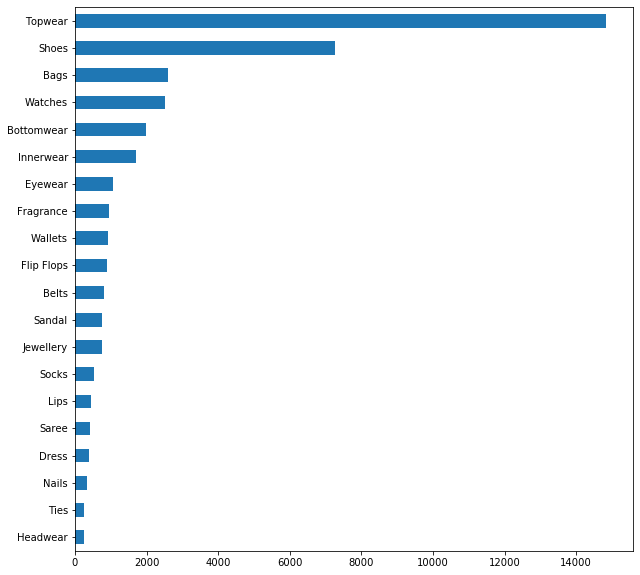

In [17]:
# remaining sub categories
plt.figure(figsize=(10,10))
df.subCategory.value_counts().sort_values().plot(kind='barh')

In [18]:
# remaining categories
print('Master Categories : ' + str(df.masterCategory.unique()))
print('\nSub Categories : ' + str(df.subCategory.unique()))
print('\nArticle Types : ' + str(df.articleType.unique()))

Master Categories : ['Apparel' 'Accessories' 'Footwear' 'Personal Care']

Sub Categories : ['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Fragrance' 'Lips' 'Saree' 'Eyewear'
 'Jewellery' 'Nails' 'Dress' 'Wallets' 'Headwear' 'Ties']

Article Types : ['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Sweatshirts'
 'Deodorant' 'Formal Shoes' 'Lipstick' 'Flats' 'Kurtas' 'Sports Shoes'
 'Shorts' 'Briefs' 'Sarees' 'Perfume and Body Mist' 'Heels' 'Sunglasses'
 'Innerwear Vests' 'Pendant' 'Nail Polish' 'Dresses' 'Skirts' 'Wallets'
 'Clutches' 'Backpacks' 'Caps' 'Trousers' 'Earrings' 'Dupatta' 'Lip Gloss'
 'Tunics' 'Trunk' 'Necklace and Chains' 'Sweaters' 'Capris' 'Ties'
 'Leggings' 'Jackets' 'Kurtis']


In [19]:
# remaining categories amounts
df.groupby(['masterCategory','subCategory']).count()['id']

masterCategory  subCategory
Accessories     Bags            2608
                Belts            802
                Eyewear         1070
                Headwear         255
                Jewellery        743
                Socks            535
                Ties             258
                Wallets          912
                Watches         2518
Apparel         Bottomwear      1976
                Dress            388
                Innerwear       1698
                Saree            427
                Topwear        14842
Footwear        Flip Flops       890
                Sandal           748
                Shoes           7258
Personal Care   Fragrance        943
                Lips             459
                Nails            329
Name: id, dtype: int64

### Undersampling
The data look better, but still has unbalanced amount of data on certain categories. So the first step we will be looking into articleType and gender combination with amounts that are above our determined maximum amount.

In [55]:
# Let's see the amount of categories which are above max amount
max_amount = 500

df_sample = df.groupby(['articleType','gender']).count().sort_values('id',ascending=False)
df_sample = df_sample[df_sample['id']>max_amount]
df_sample = df_sample[['id']].reset_index()
df_sample

,articleType,gender,id
0,Tshirts,Men,5243
1,Shirts,Men,2844
2,Casual Shoes,Men,2247
3,Kurtas,Women,1761
4,Handbags,Women,1687
5,Sports Shoes,Men,1590
6,Tops,Women,1532
7,Watches,Men,1473
8,Heels,Women,1322
9,Tshirts,Women,1116


> These data will not be dropped, but reduced to the value of max amount

In [56]:
# reducing articleType and gender combination amount to max_amount
indexes_to_save = []

for i in range(len(df_sample)):
    for idx in df[(df['articleType']==df_sample.iloc[i].articleType) &
                  (df['gender']==df_sample.iloc[i].gender)].sample(max_amount).index:
        indexes_to_save.append(idx)

indexes_to_drop = []

for i in range(len(df_sample)):
    for idx in df[(df['articleType']==df_sample.iloc[i].articleType) &
                  (df['gender']==df_sample.iloc[i].gender)].index:
        if idx not in indexes_to_save:
            indexes_to_drop.append(idx)
        
print('Amount of data to be dropped : ' + str(len(indexes_to_drop)))
print('Remaining data will be : ' + str(df.shape[0] - len(indexes_to_drop)))

Amount of data to be dropped : 17002
Remaining data will be : 22657


In [57]:
df.drop(indexes_to_drop,inplace=True)

Let's see the remaining data.

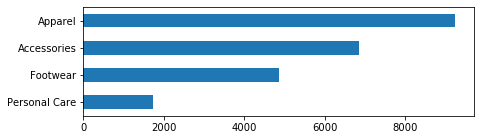

In [58]:
# remaining master categories
plt.figure(figsize=(7,2))
df.masterCategory.value_counts().sort_values().plot(kind='barh')

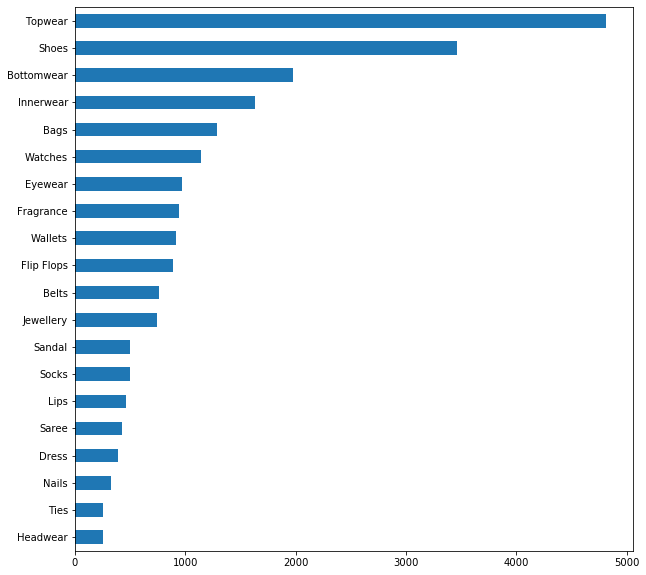

In [59]:
# remaining sub categories
plt.figure(figsize=(10,10))
df.subCategory.value_counts().sort_values().plot(kind='barh')

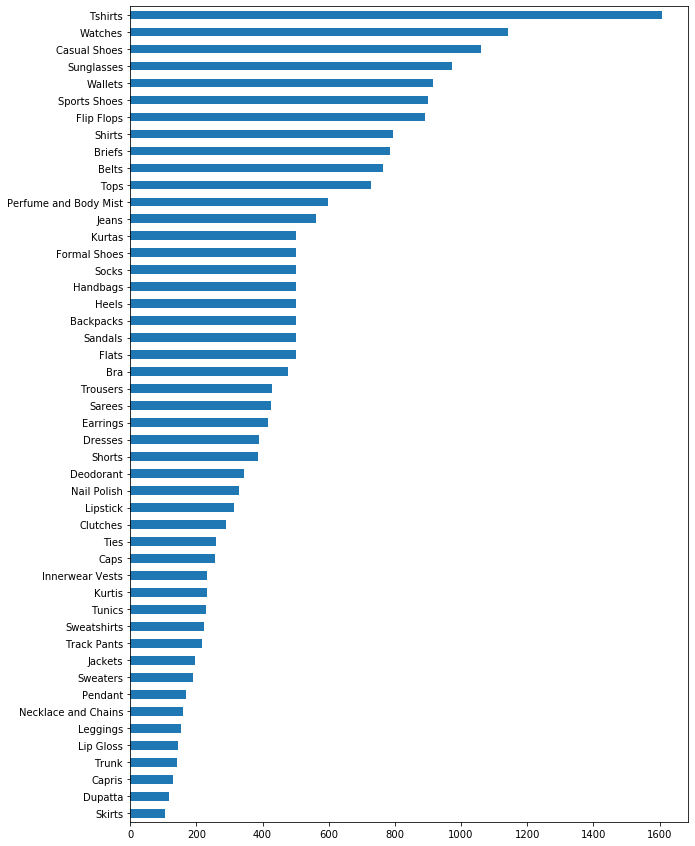

In [60]:
# remaining article types
plt.figure(figsize=(10,15))
df.articleType.value_counts().sort_values().plot(kind='barh')

> The data distribution is still not perfect. So in further steps, after the image data is converted, we will over sample the image data to provide better training for categories which has less data.

In [61]:
# additional information on the article type which has the highest amount of data (Tshirts)
dfx = df.groupby(['articleType','gender']).count().reset_index()
dfx[dfx['articleType']=='Tshirts'][['articleType','gender','id']]

,articleType,gender,id
59,Tshirts,Boys,500
60,Tshirts,Girls,106
61,Tshirts,Men,500
62,Tshirts,Women,500


Check if there are any data that the image file is not found.

In [62]:
# removing data with no image
indexes = []
for i,row in df.iterrows():
    if not os.path.isfile(DATASET_PATH + 'images/' + row.image):
        indexes.append(i)
        
print('Data with no provided image : ' + str(len(indexes)))

df.drop(indexes,inplace=True)
df.shape

Data with no provided image : 1


(22656, 11)

In [63]:
# export final data
df.to_csv('final_styles2.csv')

### Embedding image data using ResNet50

In [2]:
import tensorflow as tf
import keras
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D

Using TensorFlow backend.


In [3]:
# Input Shape
img_width, img_height, _ = 224, 224, 3

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

D:\source\Installed Program Files\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [4]:
# functions for image loading and plotting
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):  
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return DATASET_PATH+"images/"+img

def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

Testing if plotting image works.

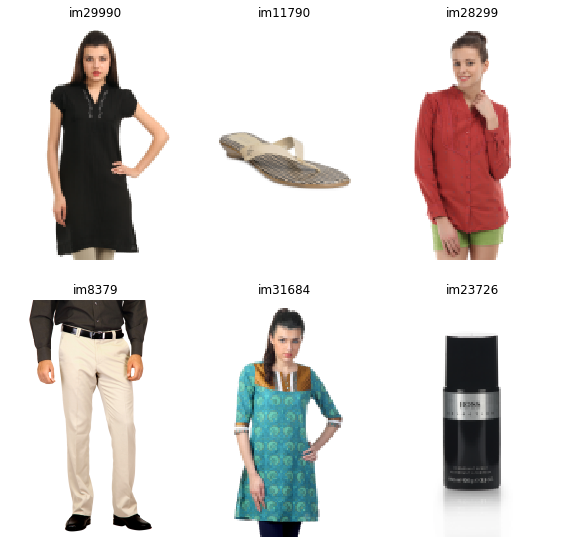

In [68]:
# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [5]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [71]:
%%time
# calculate process duration

# converting image data into numerical
# Parallel apply
df_sample      = df#.sample(10)
map_embeddings = df_sample['image'].apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

(22656, 2048)
Wall time: 1h 39min 2s


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
1,5.649736,9.132717,0.000000,8.552013,0.000000,0.106650,16.067930,2.754838,0.000000,0.000000,...,1.330357,0.111984,9.504754,4.337305,0.074342,0.000000,7.377696,0.026429,0.000000,8.451321
2,0.000000,2.788229,0.754297,0.000000,2.539878,3.851845,3.080238,0.000000,0.641055,1.447005,...,0.159295,13.468638,2.867096,1.598586,2.556870,0.378737,5.992522,0.653195,13.689517,11.015627
3,5.914846,2.232292,0.000000,11.802919,0.000000,0.000000,8.595102,3.762110,0.000000,1.319177,...,17.136992,0.000000,3.226575,1.980115,0.000000,0.000000,6.165443,0.948540,1.757253,1.303848
7,0.861216,3.639449,0.000000,3.721268,0.000000,0.000000,0.704272,1.156900,1.219262,2.974664,...,4.385935,3.835477,3.504012,17.089266,0.000000,0.000000,2.154345,2.161019,0.000000,7.274156
8,1.039733,9.232069,0.000000,1.483310,0.000000,0.000000,0.986046,3.571916,0.619291,0.646493,...,0.632879,1.290295,6.424055,0.000000,0.581709,0.000000,18.104776,0.000000,0.000000,0.000000


### Export DataFrame into CSV file

In [72]:
df_embs.to_csv('embedded2.csv')